# Assignment 7 : Hand-written Digit Classification using Deep Learning

---


Total Points: **100**

Tentative Weightage : **20%**

Submission Deadline : **24th November 2021, 11:00 AM**

---



General Instructions:

---


1. You have to do this lab individually.
2. Along with **tensorflow** and **keras**, you may use **seaborn, matplotlib, pandas, numpy, sklearn, scikit-learn libraries**
3. All the code should be submitted in the form of a single colab notebook.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). 
6. The assignment must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to write your **observations** (preferably in a text block) and not just an error free code.
9. You are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be considered for evaluation.
11. The marks will be awarded on the basis of quality of code, use of innovative data structures, scalability, correctness, and observations made.
12. You can add as many code or text cells in this notebook.
13. You will have to mount your drive and change the paths according to your implementation. 

#Dataset

###About the Dataset


The MNIST dataset is stands for the "Modified National Institute of Standards and Technology" dataset. <br> It consists of 70,000 square grayscale images of size 28x28 pixels. The images are of handwritten single digits<br> between 0 and 9 i.e. 10 classes are present.

**This dataset comes bundled with the Keras lib. You have to use mnist dataset available in keras.datasets**

#**Section 1: (10 points)**

> Indented block



1. Load dataset (1 point)

2. The MNIST dataset provide a split of Train and Test. Display total number of train and test samples in dataset (1 point).

3. print number of classes in dataset (2 points).

4. show 9 samples (images) of from train data in a matplot grid of 3x3 (3 points).

5. Plot a bar graph showing number of samples of each class in train dataset (3 points)

In [ ]:
#Imports you may need, you can add or remove according to your need

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [ ]:
#just use below given line to import the dataset from keras 
from keras.datasets import mnist



In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
# the data, split between train and test sets
data = mnist.load_data()




11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#print number of clases in dataset



In [ ]:
#print number of samples in train and test 
(x_train, y_train), (x_test, y_test) =  mnist.load_data()
print(x_train.shape, y_train.shape)
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))


(60000, 28, 28) (60000,)
x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


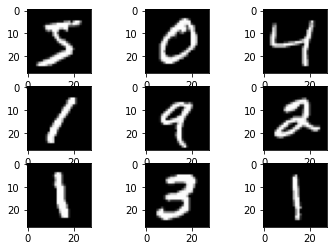

In [ ]:
#show one sample(image) of from train data
from matplotlib import pyplot
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


Plot a bar graph showing number of samples of each class in train dataset (3 points)

Text(0.5, 1.0, 'Labels in MNIST 784 dataset')

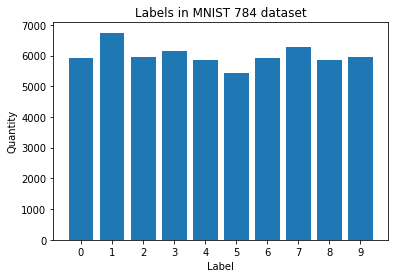

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.title("Labels in MNIST 784 dataset")

#**Section 2: Preprocessing (20 points)**

1. Reshape train and test images into (number of samples, 28, 28, 1) (5 points)

2. Normalization: It is used to change the values of numeric columns in the dataset to have a common scale (5 points).

3. One hot encoding: It is a type of representation used in multi class classification. Here each bit represents a possible category. Apply One hot encoding on Y_train and Y_test. (5 points)

4. Split train data into train and validation data in ratio 80:20 and print count in train and validation data (5 points). You may want to read about the validation set and its uses.

In [ ]:
#Reshape
from tensorflow.keras.utils import to_categorical
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print(x_train.shape)


(60000, 28, 28, 1)


In [ ]:
#Normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape)


(60000, 28, 28, 1)


In [ ]:
#Perform One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#You need to split data in train and validation data in 80:20
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


(None, None)

#**Section 3: Model (10 points)**

Create a sequential model as per the following specifications (2 points per question):<br><br> 
1. Add a Conv2D layer with 32 kernels, 3x3 filter, and relu activation
1. Add a MaxPooling layer
1. Add a Flatten layer
1. Add a dense layer with 128 units and relu activation
1. Add a dense layer with 10 units annd softmax activation


In [ ]:
def MyModel():
    batch_size = 128
    num_classes = 10
    epochs = 10
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
#call the above given function and print model summary
MyModel().summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               692352    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

#**Section 5: Model Training (20 points)**

1. You need to fit the above created model with 10 epochs, batch_size as 32, and verbose as 1 (10 points).

2. Plot a graph showing validation accuracy of the model during training. (5 points).

3. Plot a graph showing validation loss of the model during training. (5 point)

In [ ]:
#fit the above created model and plot the graphs
hist = model.fit(x_train, y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")


NameError: ignored

# **Section 6: Model Improvement (20 points)**

Improve the CNN model by adding built earlier by adding (6 points)
1. Add 2 more Conv2D layers after the first MaxPooling layer with 64 kernels in each new layer and 3x3 filter with relu activation
1. Add another MaxPooling2D layer
1. Add a "Dropout" layer with parameter 0.2

Rest layers remains the same as the previous model.

1. Fit the above created improved model with 10 epochs, batch_size as 32, and verbose as 1 (10 points).

2. Plot a graph showing validation accuracy of the model during training. (2 points).

3. Plot a graph showing validation loss of the model during training. (2 point)





In [ ]:
def Improved_Model():
	model = Sequential()
	#create the improved model
 
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
#call the above given function for improved model and print model summary


In [ ]:
#fit the model and show plots

#**Section 6: Model Evaluation (20 points)**

You need to evaluate the performance of both the models on test data and print accuracy and loss (5 points). Further, comment on the performance of each model.

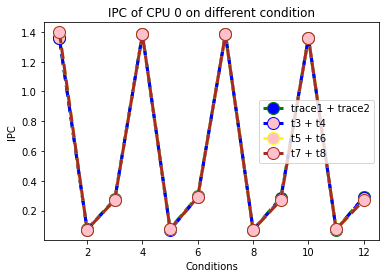

In [ ]:
#Your code and comments here
# importing the required module
import matplotlib.pyplot as plt
  
# x axis values
x = [1,2,3,4,5,6,7,8,9,10,11,12]
# corresponding y axis values
y1 = [1.35683,0.0746775,0.276476,1.38393,0.0792566,0.296844,1.3834,0.0704347,0.286304,1.36072,0.0725763,0.291852]
y2 = [
1.35698,
0.0719395,
0.272787,
1.38393,
0.0706795,
0.28873,
1.38347,
0.071012,
0.276823,
1.36072,
0.0733096,
0.287524]
y3 = [
1.3976,
0.0719555,
0.270854,
1.38393,
0.0744536,
0.290549,
1.38347,
0.0701979,
0.270406,
1.36071,
0.0739882,
0.270492]
y4 = [1.39546,
0.0712296,
0.274075,
1.38393,
0.0749594,
0.290553,
1.38347,
0.07037,
0.273369,
1.36072,
0.0737302,
0.281043]

# plotting the points 
plt.plot(x, y1, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12,  label = "trace1 + trace2")

plt.plot(x, y2, color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='pink', markersize=12,  label = "t3 + t4")

plt.plot(x, y3, color='yellow', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='pink', markersize=12,  label = "t5 + t6")

plt.plot(x, y3, color='brown', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='pink', markersize=12,  label = "t7 + t8")
  
# naming the x axis
plt.xlabel('Conditions')
# naming the y axis
plt.ylabel('IPC')
  
# giving a title to my graph
plt.title('IPC of CPU 0 on different condition')
plt.legend()
  
# function 
